<p><img alt="Colaboratory logo" height="50px" src="https://github.com/INGEOTEC/text_models/raw/master/docs/source/ingeotec.png" align="left" hspace="10px" vspace="0px" /></p>

# CompStats
## Quickstart Guide

### <http://compstats.readthedocs.org>



## Installing CompStats

In [1]:
# !python -m pip uninstall CompStats

In [2]:
# %pip install -U git+https://github.com/INGEOTEC/CompStats@origin/develop
%pip install "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"
# %pip install -U git+https://github.com/INGEOTEC/CompStats@develop
# %pip install CompStats

Processing c:\users\sergio nava\documentos\github\ingeotec\compstats
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for CompStats: filename=CompStats-0.0.8-py3-none-any.whl size=26781 sha256=6c322efdeca26adf3f19403b549b63f38737096de341b93fc8bb82a8912225ee
  Stored in directory: C:\Users\Sergio Nava\AppData\Local\Temp\pip-ephem-wheel-cache-4575s_jq\wheels\19\3d\47\ac1dd586fda7dec78f516b825f8dc8d5f94f7a7b7820cd22b0
Successfully built CompStats
  Attempting uninstall: CompStats
    Found existing installation: CompStats 0.0.8
    Uninstalling CompStats-0.0.8:
      Successfully uninstalled CompStats-0.0.8
Note: you may need to restart the kernel to use updated packages.


First, we need to install CompStats. This can be quickly done through pip, the Python package manager.

In [3]:
try:
  import CompStats
except ImportError:
    %pip install "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"

## Libraries

After installing `CompStats`, we must import the necessary libraries for our analysis. `CompStats` relies on several Python libraries for data analysis and scientific computing.

The first line of the following code loads two functions from the `CompStats` library. The `performance` function is used to calculate and analyze the performance of machine learning models. On the other hand, the `plot_performance` function visualizes the performance metrics calculated by `performance`, such as accuracy or F1 score, along with confidence intervals to help understand the variability and reliability of the performance metrics.

The second line imports two functions: `difference` and `plot_difference`; `difference` assesses the differences in performance between models in comparison to the best system, and `plot_difference` visually represents these differences relative to the best system.

The third line imports two functions: `all_differences` and `difference_p_value`. `all_differences` evaluates the differences in performance between all models, and `difference_p_value` estimates the p-value of the hypothesis that the difference is significantly greater than zero.

The fourth line imports the function `multipletests`that is used for adjusting p-values when multiple hypothesis tests are performed, to control for the false discovery rate or family-wise error rate.

The rest of the lines load commonly used Python libraries.

In [4]:
from CompStats import performance, plot_performance
from CompStats import difference, plot_difference
from CompStats import all_differences, difference_p_value
from statsmodels.stats.multitest import multipletests
from sklearn.metrics import mean_absolute_error as mae 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# la siguiente línea es para cargar el modulo measurements para calcular el CI 
from CompStats import measurements

# Dataset

Once we have set up our environment, we can explore what CompStats offers. Let's begin with a basic example of how to use CompStats for a simple statistical analysis.

To illustrate the use of CompStats, we will use a dataset included in the CompStats package. The path of the dataset is found with the following instructions. The variable `DATA` contains the path as shown below.  

In [5]:
# from CompStats.tests.test_performance import DATA
import os
DATA = "C:\\Users\\Sergio Nava\\Documentos\\GitHub\\INGEOTEC\\CompStats\\CompStats\\tests\\data.csv"

`DATA` contains the information to compare six systems for a multiclass classification task. The next instruction loads the data into a dataframe.

In [6]:
df = pd.read_csv(DATA)

The first five rows of `df` are shown below. It can be observed that the first column contains the gold standard, identified with `y`, and the rest of the columns are the predictions performed by different systems.

In [7]:
df

,y,BoW (Corpus),BoW,INGEOTEC,BoW (Class Weight),Dense,StackBoW
0,0,2,2,2,2,2,2
1,6,6,6,6,6,5,6
2,7,5,5,5,5,5,5
3,5,4,4,4,4,5,4
4,4,7,5,4,6,6,6
...,...,...,...,...,...,...,...
1575,5,1,5,1,5,2,2
1576,4,5,5,5,5,5,5
1577,5,6,5,6,6,6,6
1578,6,4,4,4,4,4,4


# Performance Anaylisis

Let us start with the performance analysis of the different systems. The performance metric used is the weighted average F1 score. This performance is coded in the variable `score` as observed in the next instruction.

In [8]:
score = lambda y, hy: mae(y, hy)

The next step is to compute the performance on the bootstrap samples; this is done with the function `performance`. The function has a few parameters; one is the `score`, which receives the metric used to measure the performance.

In [9]:
perf = performance(df, score=score,num_samples=1000,BiB=False)

100%|██████████| 7/7 [00:12<00:00,  1.78s/it]


In [10]:
for key, value in perf.calls.items():
    result = measurements.CI(value)
    media = np.mean(value)
    print(f"Key: {key}, CI: {result}, mean={media:.4f}")

Key: BoW (Corpus), CI: (1.50251582278481, 1.6721518987341772), mean=1.5875
Key: BoW, CI: (1.2183544303797469, 1.3727848101265823), mean=1.2950
Key: INGEOTEC, CI: (1.5044145569620253, 1.6842246835443038), mean=1.5933
Key: BoW (Class Weight), CI: (1.530379746835443, 1.7019145569620253), mean=1.6142
Key: Dense, CI: (1.5949208860759494, 1.7620411392405064), mean=1.6747
Key: StackBoW, CI: (1.4563132911392405, 1.626629746835443), mean=1.5414


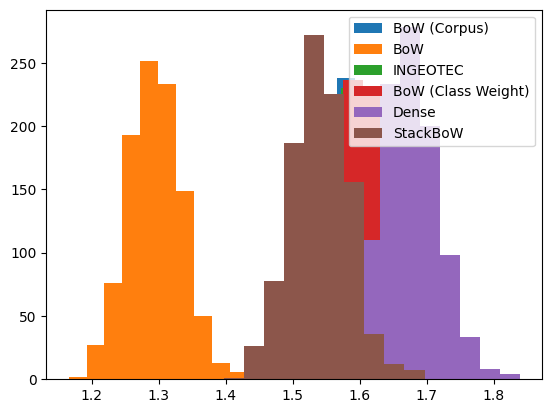

In [11]:
for key, value in perf.calls.items():
    plt.hist(value,label=key)
plt.legend(loc='upper right')    

`perf` is an instance of `StatisticSamples`, the bootstrap samples can be seen on the property `calls`. The first five bootstrap samples of the performance of INGEOTEC are shown below. -- It verifies that the key is in the dictionary in case the dataset has been changed. --

In [12]:
if 'BoW' in perf.calls:
  print(f"{perf.calls['BoW'][:5]}")

[1.22531646 1.29873418 1.33670886 1.35506329 1.34873418]


The performance of the systems, along with their confidence intervals, can be seen using the next instruction.

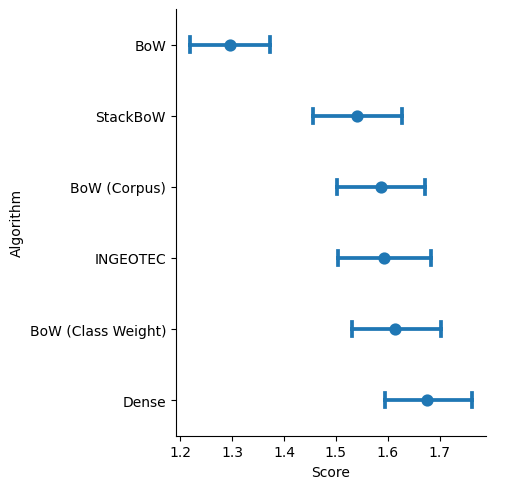

In [13]:
face_grid = plot_performance(perf)

It can be observed that the best system is 'Alumni.MCE.2GEN.run1'. Although the confidence intervals provide information that helps to assess the difference in the performance of the systems, in this case, the intervals intersect. Therefore, one needs another statistical tool to determine if the difference in performance is significant.

# Performance Comparison against the Winner

The difference in their performance compared to the best-performing system can be used to compare the algorithms analyzed. The function `difference` computes the difference as shown below.

In [14]:
diff = difference(perf) 

In [15]:
diff.calls

{'StackBoW': array([-0.25063291, -0.26708861, -0.2335443 , -0.23607595, -0.20506329,
        -0.23164557, -0.22025316, -0.20759494, -0.20316456, -0.25189873,
        -0.23860759, -0.21898734, -0.1943038 , -0.26455696, -0.26772152,
        -0.25253165, -0.23607595, -0.21835443, -0.26139241, -0.23987342,
        -0.22025316, -0.2556962 , -0.18607595, -0.28924051, -0.21329114,
        -0.1943038 , -0.23924051, -0.25253165, -0.27341772, -0.29746835,
        -0.1943038 , -0.21075949, -0.27974684, -0.26392405, -0.26455696,
        -0.22911392, -0.22974684, -0.19493671, -0.24620253, -0.26329114,
        -0.23481013, -0.2056962 , -0.18037975, -0.29873418, -0.19936709,
        -0.24873418, -0.24936709, -0.25      , -0.22658228, -0.21708861,
        -0.26518987, -0.27341772, -0.23924051, -0.18670886, -0.23860759,
        -0.23227848, -0.1556962 , -0.23544304, -0.22911392, -0.24113924,
        -0.20506329, -0.21392405, -0.30379747, -0.22848101, -0.21329114,
        -0.23227848, -0.28860759, -0.26

`diff` is an instance of `StatisticSamples`; one can find the best system on the property `info`, as the following instruction shows.

In [16]:
print(f'El ganador de la competencia es {diff.info}')
if diff.BiB:
    print(f'La competencia es Mayor es Mejor')
else:
    print(f'La competencia es Menor es Mejor')

El ganador de la competencia es {'best': 'BoW'}
La competencia es Menor es Mejor


CI for the difference against the winner.

In [17]:
for key, value in diff.calls.items():
    result = measurements.CI(value)
    media = np.mean(value)
    print(f"Key: {key}, CI: {result}, mean={media:.4f}")

Key: StackBoW, CI: (-0.3196360759493672, -0.17909810126582265), mean=-0.2464
Key: BoW (Corpus), CI: (-0.35822784810126596, -0.22023734177215176), mean=-0.2925
Key: INGEOTEC, CI: (-0.37659810126582277, -0.2183544303797469), mean=-0.2983
Key: BoW (Class Weight), CI: (-0.3855063291139241, -0.24745253164556963), mean=-0.3193
Key: Dense, CI: (-0.46139240506329116, -0.29485759493670893), mean=-0.3797


The difference in performance can be visualized with the following instruction.

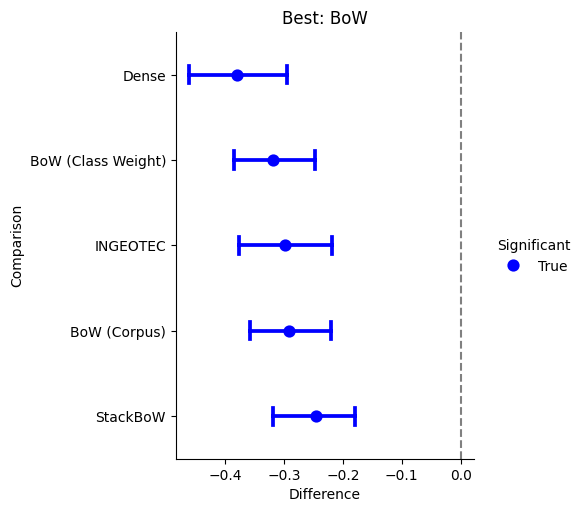

In [18]:
face_grid_diff = plot_difference(diff)

Text(0.5, 1.0, 'Ganador: BoW')

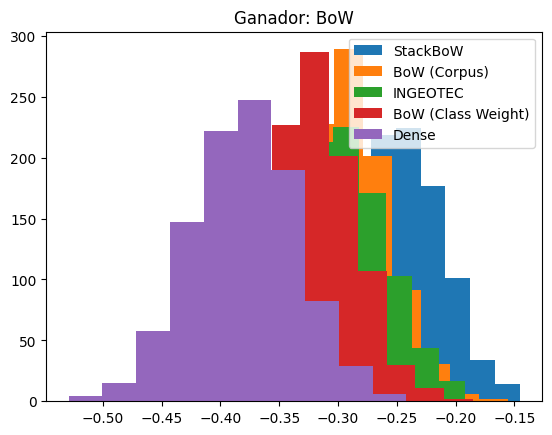

In [19]:
for key, value in diff.calls.items():
    plt.hist(value,label=key)
plt.legend(loc='upper right')    
plt.title(f"Ganador: {diff.info['best']}" )

From the performance graphs, for this example, we can observe that the ranking is *INGEOTEC*, *BoW*, *StackBoW*, *BoW (Corpus)*, *Dense*, *Bow (Class Weight)*. Hence, in the last graph, we analyze the performance difference against the winner (INGEOTEC). From this graph, we can conclude that *BoW* and *StackBoW*, might perform similarly to INGEOTEC.

Should we test the hypothesis of equality versus difference, considering that one system outperforms the other in the test? To address this question, we compare the performance of two systems, $A$ and $B$, to determine whether $A$ is superior to $B$ in a larger data population, represented as $\theta_A > \theta_B$. We can estimate the p-value associated with the hypothesis test $H_0: \theta_A \le \theta_B$ vs $H_1: \theta_A > \theta_B$ given the data, equivalently $H_0: \theta_A< -  \theta_B\le 0$ vs $H_1: \theta_A - \theta_B > 0$. The p-values for these differences can be estimated using the following instruction, comparing them against the winner (INGEOTEC) to determine the probability that $a$ (INGEOTEC) is better than $b$.

The `difference_p_value` function estimates the p-value for each difference in comparison to the best system, as illustrated below.


In [20]:
p_values = difference_p_value(diff)

For a given $\alpha$ level, p-values smaller than $\alpha$  are significant, meaning the observed difference is unlikely to be due to chance. An $\alpha$ level of 0.05 is commonly used.

In [21]:
p_values

{'StackBoW': 0.0,
 'BoW (Corpus)': 0.0,
 'INGEOTEC': 0.0,
 'BoW (Class Weight)': 0.0,
 'Dense': 0.0}

In [22]:
#comparacon = 'mayoritariaRecomendacion'
comparacon = 'BoW (Corpus)'
may2 = np.mean(diff.calls[comparacon] < 2 * np.mean(diff.calls[comparacon], axis=0), axis=0)
men0 = np.mean(diff.calls[comparacon] > 0, axis=0)
print(f"Mayor que 2V: {may2}")
print(f"Menor que 0 : {men0}")

Mayor que 2V: 0.0
Menor que 0 : 0.0


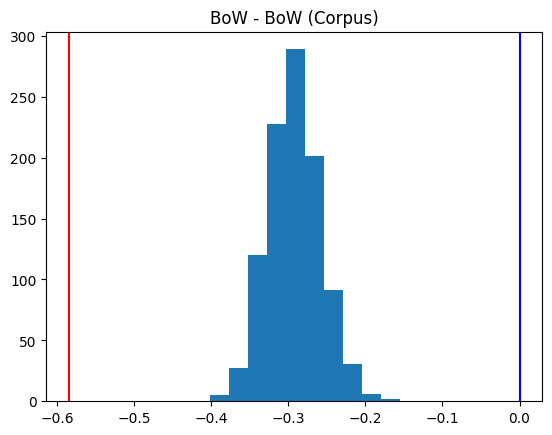

In [23]:

plt.hist(diff.calls[comparacon])
plt.title(f"BoW - {comparacon}")
plt.axvline(x = 0, color = 'b', label = '0')
plt.axvline(x = 2 * np.mean(diff.calls[comparacon], axis=0), color = 'r', label = '0')

In [24]:
result = multipletests(list(p_values.values()), method='bonferroni')
p_valuesC = dict(zip(p_values.keys(),result[1]))
p_valuesC

{'StackBoW': 0.0,
 'BoW (Corpus)': 0.0,
 'INGEOTEC': 0.0,
 'BoW (Class Weight)': 0.0,
 'Dense': 0.0}

# Performance comparison between all models

Similarly, the differences for each pair of variables between all models can be estimated using the function `all_differences`, as illustrated in the following instructions. This approach allows for a comprehensive analysis of how each model compares to the others, providing a statistical basis to understand the significance of performance variations among them. This method extends the comparative analysis, offering a detailed view of the competitive landscape of model performance.

In [25]:
all_diff = all_differences(perf)
# reverse = False cuando Menor es mejor
# reverse = True  cuando Mayor es mejor

In [26]:
all_diff.calls

{'BoW - StackBoW': array([-0.25063291, -0.26708861, -0.2335443 , -0.23607595, -0.20506329,
        -0.23164557, -0.22025316, -0.20759494, -0.20316456, -0.25189873,
        -0.23860759, -0.21898734, -0.1943038 , -0.26455696, -0.26772152,
        -0.25253165, -0.23607595, -0.21835443, -0.26139241, -0.23987342,
        -0.22025316, -0.2556962 , -0.18607595, -0.28924051, -0.21329114,
        -0.1943038 , -0.23924051, -0.25253165, -0.27341772, -0.29746835,
        -0.1943038 , -0.21075949, -0.27974684, -0.26392405, -0.26455696,
        -0.22911392, -0.22974684, -0.19493671, -0.24620253, -0.26329114,
        -0.23481013, -0.2056962 , -0.18037975, -0.29873418, -0.19936709,
        -0.24873418, -0.24936709, -0.25      , -0.22658228, -0.21708861,
        -0.26518987, -0.27341772, -0.23924051, -0.18670886, -0.23860759,
        -0.23227848, -0.1556962 , -0.23544304, -0.22911392, -0.24113924,
        -0.20506329, -0.21392405, -0.30379747, -0.22848101, -0.21329114,
        -0.23227848, -0.28860759,

In [27]:
for key, value in all_diff.calls.items():
    result = measurements.CI(value)
    media = np.mean(value)
    print(f"Key: {key}, CI: {result}, mean={media:.4f}")

Key: BoW - StackBoW, CI: (-0.3196360759493672, -0.17909810126582265), mean=-0.2464
Key: BoW - BoW (Corpus), CI: (-0.35822784810126596, -0.22023734177215176), mean=-0.2925
Key: BoW - INGEOTEC, CI: (-0.37659810126582277, -0.2183544303797469), mean=-0.2983
Key: BoW - BoW (Class Weight), CI: (-0.3855063291139241, -0.24745253164556963), mean=-0.3193
Key: BoW - Dense, CI: (-0.46139240506329116, -0.29485759493670893), mean=-0.3797
Key: StackBoW - BoW (Corpus), CI: (-0.10634493670886067, 0.017737341772151763), mean=-0.0461
Key: StackBoW - INGEOTEC, CI: (-0.1114082278481012, 0.008892405063291158), mean=-0.0519
Key: StackBoW - BoW (Class Weight), CI: (-0.128496835443038, -0.015806962025316337), mean=-0.0729
Key: StackBoW - Dense, CI: (-0.2069620253164557, -0.06003164556962022), mean=-0.1334
Key: BoW (Corpus) - INGEOTEC, CI: (-0.06645569620253156, 0.051914556962025356), mean=-0.0058
Key: BoW (Corpus) - BoW (Class Weight), CI: (-0.06772151898734191, 0.016455696202531518), mean=-0.0267
Key: BoW (Co

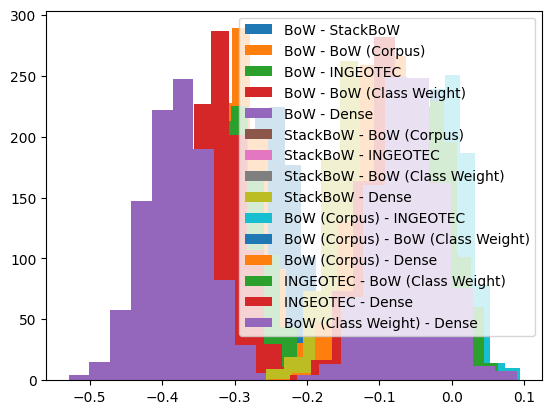

In [28]:
for key, value in all_diff.calls.items():
    plt.hist(value,label=key)
plt.legend(loc='upper right')    

Once again, we use the function `difference_p_value` to estimate the p-value.

In [29]:
p_values = difference_p_value(all_diff)

And we can analyze from all pairs of systems individually which ones have significantly different performances by comparing their p-value with $\alpha$.

In [30]:
p_values

{'BoW - StackBoW': 0.0,
 'BoW - BoW (Corpus)': 0.0,
 'BoW - INGEOTEC': 0.0,
 'BoW - BoW (Class Weight)': 0.0,
 'BoW - Dense': 0.0,
 'StackBoW - BoW (Corpus)': 0.077,
 'StackBoW - INGEOTEC': 0.048,
 'StackBoW - BoW (Class Weight)': 0.007,
 'StackBoW - Dense': 0.0,
 'BoW (Corpus) - INGEOTEC': 0.418,
 'BoW (Corpus) - BoW (Class Weight)': 0.111,
 'BoW (Corpus) - Dense': 0.021,
 'INGEOTEC - BoW (Class Weight)': 0.242,
 'INGEOTEC - Dense': 0.024,
 'BoW (Class Weight) - Dense': 0.093}

When conducting numerous comparisons or hypothesis tests on a dataset, the risk of incurring Type I errors (incorrectly dismissing a valid null hypothesis) increases. This happens because more tests performed increase the probability of randomly identifying statistically significant outcomes. Implementing adjustments for multiple comparisons is critical for several reasons: (1) To manage the risk of Type I Error, (2) To prevent erroneous conclusions, and (3) To uphold the integrity of the research.

The following code illustrates the effect of these methods for multiple comparison corrections. The function `multipletests` makes the p-value correction by selecting the parameter `method`. In this example, the Bonferroni correction method is used.

In [31]:
result = multipletests(list(p_values.values()), method='bonferroni')

`result` is an array; next, we convert it back into a dictionary.

In [32]:
p_valuesC = dict(zip(p_values.keys(),result[1]))

And we can analyze from all pairs of systems simunstally which ones have significantly different performances by comparing their p-value with $\alpha$.

In [33]:
p_valuesC

{'BoW - StackBoW': 0.0,
 'BoW - BoW (Corpus)': 0.0,
 'BoW - INGEOTEC': 0.0,
 'BoW - BoW (Class Weight)': 0.0,
 'BoW - Dense': 0.0,
 'StackBoW - BoW (Corpus)': 1.0,
 'StackBoW - INGEOTEC': 0.72,
 'StackBoW - BoW (Class Weight)': 0.105,
 'StackBoW - Dense': 0.0,
 'BoW (Corpus) - INGEOTEC': 1.0,
 'BoW (Corpus) - BoW (Class Weight)': 1.0,
 'BoW (Corpus) - Dense': 0.315,
 'INGEOTEC - BoW (Class Weight)': 1.0,
 'INGEOTEC - Dense': 0.36,
 'BoW (Class Weight) - Dense': 1.0}